In [1]:
# Part 1 #################################################################################################################
#Step 1: Exploring and Preparing the Data 
import pandas as pd # import the csv file 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
from scipy import stats
input_file = "C:/MyData Late-Spring/530 Machine Learning/data/Absenteeism_at_work_train.csv"
data_abs = pd.read_csv(input_file)

In [2]:
data_abs.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
1,28,19,4,2,3,225,26,9,28,"246,288",...,0,1,1,0,0,2,69,169,24,8
2,25,16,4,3,3,235,16,8,32,"246,288",...,0,3,0,0,0,0,75,178,25,3
3,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
4,14,28,4,3,3,155,12,14,34,"246,288",...,0,1,2,1,0,0,95,196,25,4


In [3]:
data_abs.rename(columns={'Absenteeism time in hours':'AbsentHrs','Work load Average/day':'WorkloadAverageday'}, inplace=True)

In [4]:
#data.rename(columns={'WorkloadAverageday':'WkloadAvgDay'}, inplace=True)
data_abs.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,AbsentHrs
0,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
1,28,19,4,2,3,225,26,9,28,"246,288",...,0,1,1,0,0,2,69,169,24,8
2,25,16,4,3,3,235,16,8,32,"246,288",...,0,3,0,0,0,0,75,178,25,3
3,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
4,14,28,4,3,3,155,12,14,34,"246,288",...,0,1,2,1,0,0,95,196,25,4


In [5]:
data_abs.dtypes

ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
WorkloadAverageday                 object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
AbsentHrs                           int64
dtype: object

In [6]:
#data["Age"] = data.Age.astype(float) there was an error as there was  a string value in Age -- R
#data.drop(data.index[data['Age'] == 'R'], inplace = True)
data_abs.Age = data_abs.Age.replace("R", 0)
data_abs['Age'] = data_abs['Age'].astype('int64')
#data['WorkloadAverageDay'] = data['WorkloadAverageDay'].astype('int')

#data['WorkloadAverageDay'] = pd.to_numeric(data.WorkloadAverageDay)

In [7]:
#data["WorkloadAverageday"] = data.WorkloadAverageday.replace(',', '')
#data["WorkloadAverageday"] = data['WorkloadAverageday'].astype('float')
#data["WorkloadAverageday"] = float(data["WorkloadAverageday"]) # turn from string to float.
# convert X into dataframe
X_pd = pd.DataFrame(data = data_abs.WorkloadAverageday)
# replace all instances of URC with 0 
X_replace = X_pd.replace(',','', regex=True)
# convert it back to numpy array
X_np = X_replace.values
# set the object type as float
X_fa = X_np.astype('float64')
data_abs["WorkloadAverageday"] = X_fa 
data_abs.dtypes
del data_abs['Body mass index']

In [8]:
missing_val = pd.DataFrame(data_abs.isna().sum())
missing_val

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
WorkloadAverageday,0


In [9]:
import numpy as np
data_abs[data_abs==np.inf]=np.nan
data_abs.fillna(data_abs.mean(), inplace=True)
#data.fillna(0)
data = data_abs

In [10]:
#three rows where it was blank Hit target 1 and Weight 2 is replaced it with mean values 

ID                                    AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Reason for absence                 AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Month of absence                   AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Day of the week                       AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Seasons                            AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
Transportation expense             AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
Distance from Residence to Work       AxesSubplot(0.125,0.606915;0.227941x0.0803191)
Service time                       AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Age                                AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
WorkloadAverageday                    AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Hit target                         AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Disciplinary failure               AxesSubplot(0.672059,0.510532;

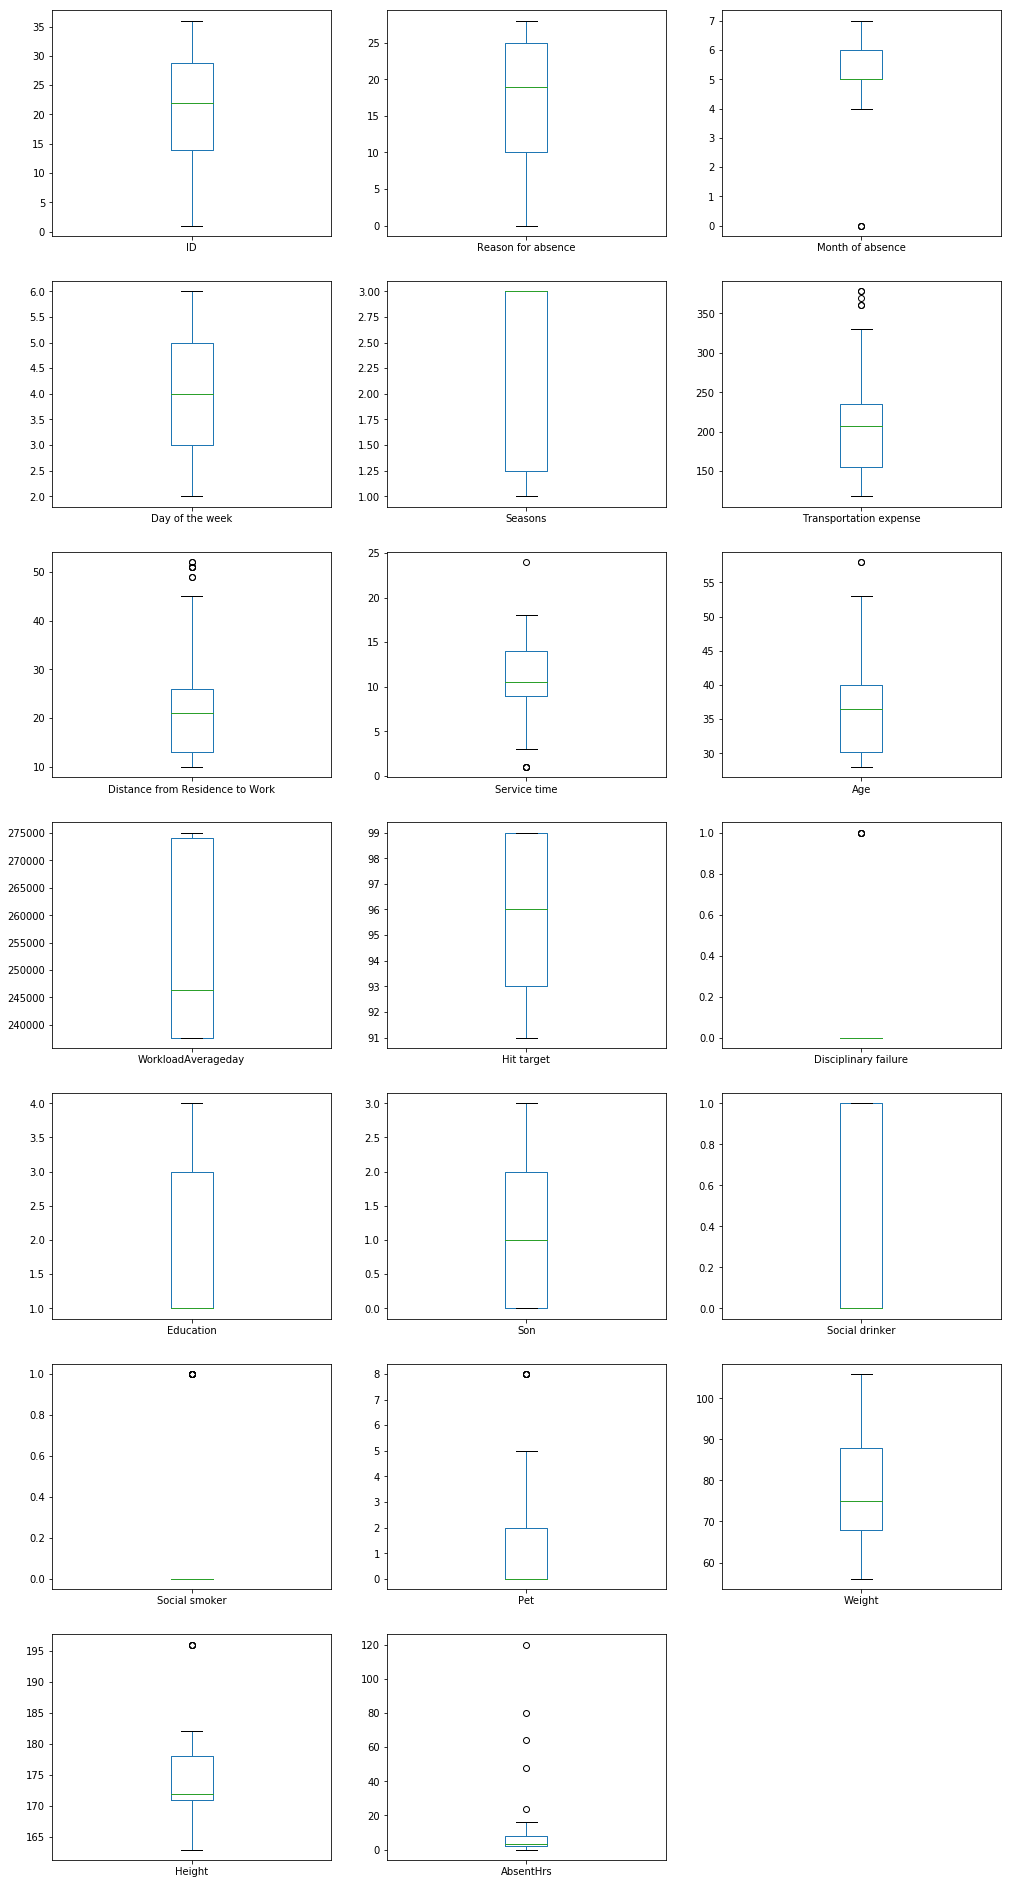

In [11]:
data_abs.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)

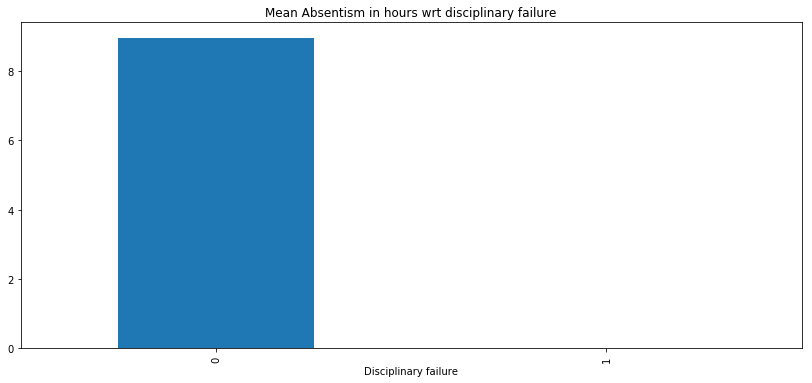

In [12]:
data_abs.groupby('Disciplinary failure')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours wrt disciplinary failure',figsize=(14,6))
plt.show()

C:\Users\roli\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\roli\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\roli\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\roli\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; ple

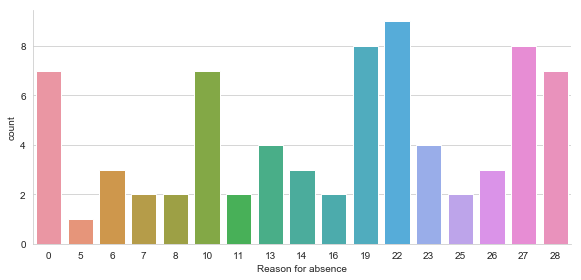

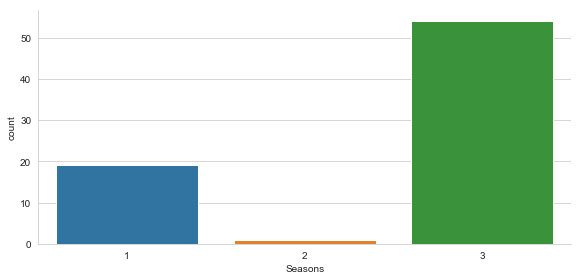

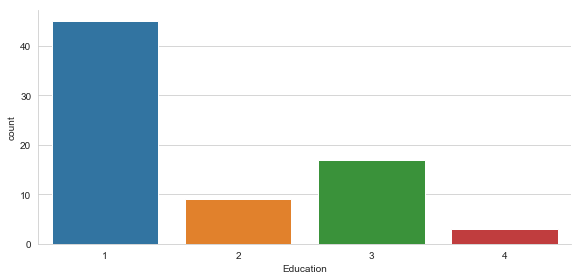

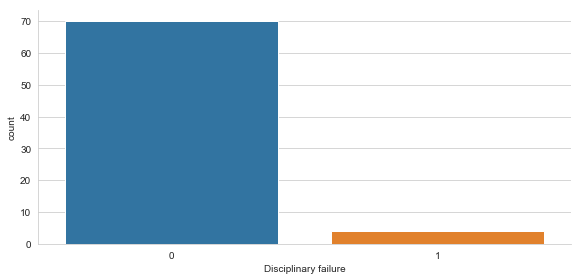

In [13]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=data_abs, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data_abs, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data_abs, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data_abs, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

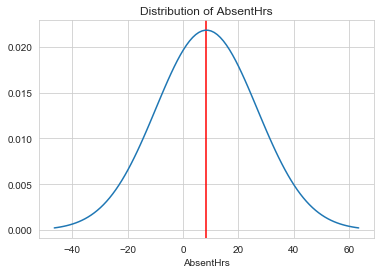

In [14]:
mu = data_abs['AbsentHrs'].mean() 
sigma = data_abs['AbsentHrs'].std() 
x = np.linspace(mu-3*sigma, mu+3*sigma, 100) 
plt.axvline(x=mu,color='r') 
plt.plot(x, norm.pdf(x,mu,sigma)) 
plt.title('Distribution of AbsentHrs')
plt.xlabel('AbsentHrs')
plt.show()

In [15]:
data_abs_new = data_abs[(np.abs(stats.zscore(data_abs)) < 3).all(axis=1)] 

data_abs_new.describe() 

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,AbsentHrs
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,22.875000,18.964286,5.446429,4.160714,2.535714,201.000000,21.339286,11.446429,36.321429,252424.178571,96.285714,0.0,1.839286,0.750000,0.321429,0.089286,0.678571,76.017857,172.857143,5.000000
std,9.736646,7.538903,0.912930,1.358834,0.852041,69.302237,10.198532,4.062778,7.191174,16215.029865,2.970854,0.0,1.040573,0.768706,0.471251,0.287736,1.097222,14.583292,3.914674,4.094342
min,1.000000,5.000000,4.000000,2.000000,1.000000,118.000000,10.000000,3.000000,28.000000,237656.000000,91.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,167.000000,1.000000
25%,16.750000,12.500000,5.000000,3.000000,3.000000,118.000000,13.000000,9.000000,30.000000,237656.000000,93.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,64.500000,171.000000,2.000000
50%,22.000000,22.000000,5.000000,4.000000,3.000000,179.000000,21.000000,10.000000,37.000000,246288.000000,96.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,75.000000,172.000000,3.000000
75%,30.250000,26.250000,6.000000,5.000000,3.000000,235.000000,26.000000,14.000000,40.000000,267225.250000,99.000000,0.0,3.000000,1.000000,1.000000,0.000000,1.000000,83.250000,174.250000,8.000000
max,36.000000,28.000000,7.000000,6.000000,3.000000,378.000000,52.000000,24.000000,58.000000,275089.000000,99.000000,0.0,4.000000,2.000000,1.000000,1.000000,4.000000,106.000000,182.000000,24.000000


In [16]:
print('Number of dropped instances= ',data_abs.shape[0]-data_abs_new.shape[0])

Number of dropped instances=  18


In [17]:
data = data_abs_new

target = data['AbsentHrs']

In [18]:
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
hrs_label = pd.Series(label_encoder.fit_transform(target>6))

In [19]:
import numpy as np
Grp0 = (data.AbsentHrs == 0)
x = data.AbsentHrs > 0
y = data.AbsentHrs <= 6 
Grp1 = np.logical_and(x, y)
Grp2 = data.AbsentHrs > 6


data.loc[Grp2,'AbsentHrs'] = 2
data.loc[Grp1,'AbsentHrs'] = 1
data.loc[Grp0,'AbsentHrs'] = 0

Grp0.value_counts()

C:\Users\roli\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


False    56
Name: AbsentHrs, dtype: int64

In [20]:
target = data[data.keys()[-1]]

In [21]:
#Next, use a 75%/25% split for training and test data, i.e. use 75% of the records for the training set and 25% of the
#records for the test set. Report the number of missing values you find in the data in your results report. Use the 
#randomization seed of 123.
from sklearn.model_selection import train_test_split 
y = target 
X = data.drop(['AbsentHrs'],axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [23]:
#If the randomization went well then the percentages between splits should be close.
#Before we checked on the number of defaults for both training and test.This time we want to see the percentage of each: 
y_train.value_counts()/y_train.shape

1    0.613636
2    0.386364
Name: AbsentHrs, dtype: float64

In [24]:
y_test.value_counts()/y_test.shape

1    0.583333
2    0.416667
Name: AbsentHrs, dtype: float64

In [25]:
# Design decision tree 
# Design decision tree 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
model = tree.DecisionTreeClassifier() 
model = model.fit(X_train, y_train)

In [26]:
#Step 4: Evaluating Model Performance
#We still need to use our test set to evaluate/validate the model’s overall performance. 
#To do this we’ll use the predict() command as follows:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test) 
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[5 2]
 [2 3]]
66.66666666666666


In [27]:
#To get the basic information about the tree, you can export the information of the model to a .dot file. 
from sklearn.tree import export_graphviz 
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(model, out_file ='tree.dot', feature_names =X.columns)

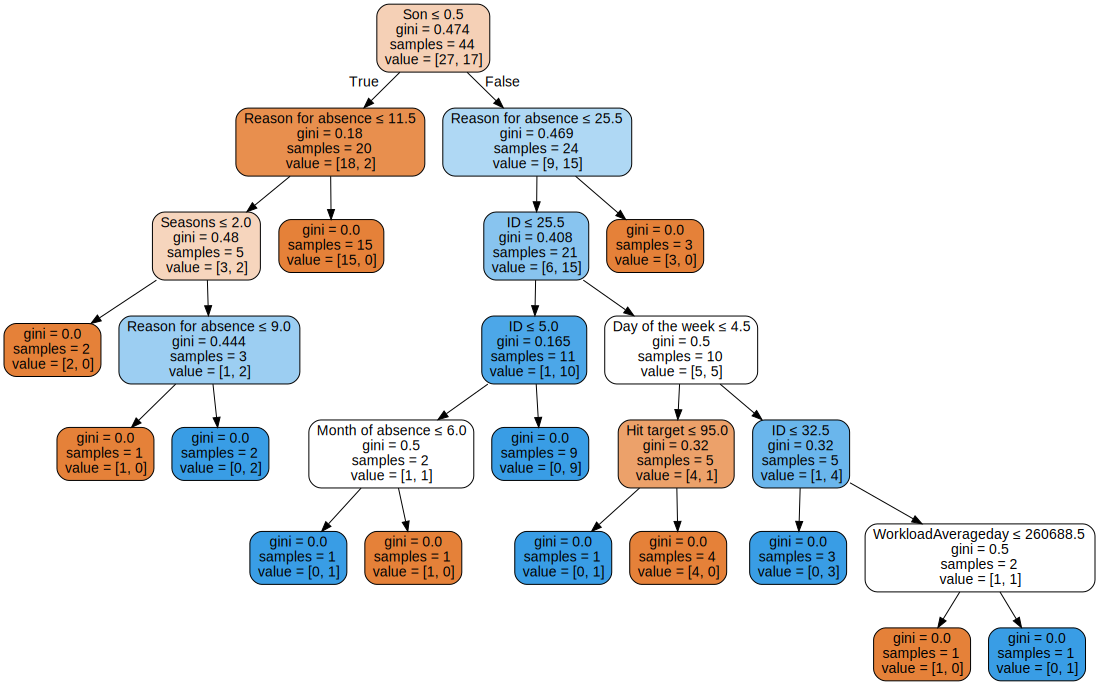

In [28]:
#You may see the regression graph using following commands: 
from graphviz import Source 
dot_data = tree.export_graphviz(model, out_file=None,feature_names=X.columns, filled=True, rounded=True, special_characters=True) 
graph = Source(dot_data) 
graph

In [29]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[5 2]
 [3 2]]
58.333333333333336


C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
#One of the interesting properties of Random forest algorithm is that it lets you see the importance of features.
import pandas as pd 
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Reason for absence,0.169135
Son,0.160617
Day of the week,0.092891
Service time,0.075721
Pet,0.074385
ID,0.064398
Transportation expense,0.053513
WorkloadAverageday,0.047198
Social smoker,0.044600
Month of absence,0.041178


In [31]:
from sklearn.metrics import mean_squared_error
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.6454972243679028

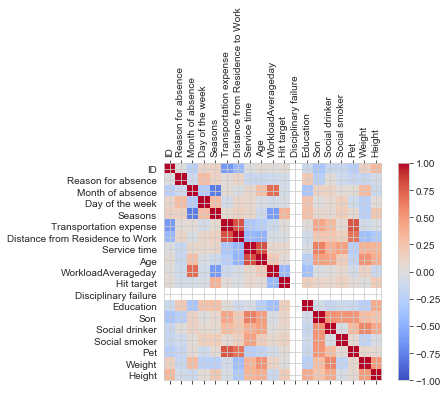

In [32]:
#Step 1: Exploring and Preparing the Data
import matplotlib.pyplot as plt 
import numpy as np
corr = X_train.corr() 
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0,len(X_train.columns),1) 
ax.set_xticks(ticks) 
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(X_train.columns) 
ax.set_yticklabels(X_train.columns) 
plt.show()

In [33]:
corr

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height
ID,1.000000,-0.010639,-0.250199,0.101958,0.144747,-0.624316,-0.441571,-0.015541,0.049531,0.012254,0.046923,NaN,-0.125858,-0.342363,-0.161947,-0.161583,-0.260956,0.150511,0.337327
Reason for absence,-0.010639,1.000000,-0.124411,0.304034,0.140324,0.033583,0.119180,-0.145166,-0.137710,-0.109815,-0.076942,NaN,0.203899,-0.247656,0.016106,-0.114813,-0.166252,-0.157294,-0.079119
Month of absence,-0.250199,-0.124411,1.000000,-0.281601,-0.772201,0.048725,-0.042350,0.100295,0.287140,0.699466,-0.067451,NaN,-0.342265,0.133807,0.135272,0.038450,0.047554,0.313494,-0.132149
Day of the week,0.101958,0.304034,-0.281601,1.000000,0.303895,-0.071187,0.116788,0.086700,-0.042364,-0.085201,-0.037373,NaN,0.261190,0.000000,0.070630,0.171652,-0.114367,-0.237217,0.036332
Seasons,0.144747,0.140324,-0.772201,0.303895,1.000000,0.073711,0.134302,0.095510,-0.118282,-0.611890,0.374797,NaN,0.281896,0.084941,0.056344,0.182574,0.057021,-0.255746,0.224620
Transportation expense,-0.624316,0.033583,0.048725,-0.071187,0.073711,1.000000,0.789311,-0.322833,-0.262425,-0.131667,0.036529,NaN,0.030975,0.422088,0.312503,0.054998,0.782673,-0.085774,-0.046115
Distance from Residence to Work,-0.441571,0.119180,-0.042350,0.116788,0.134302,0.789311,1.000000,-0.444408,-0.462588,-0.058216,-0.023869,NaN,-0.102544,0.210951,0.228034,0.159712,0.664344,-0.394555,-0.306587
Service time,-0.015541,-0.145166,0.100295,0.086700,0.095510,-0.322833,-0.444408,1.000000,0.810110,0.090316,0.086014,NaN,-0.048318,0.614834,0.386903,0.465405,-0.261525,0.373281,0.348577
Age,0.049531,-0.137710,0.287140,-0.042364,-0.118282,-0.262425,-0.462588,0.810110,1.000000,0.203531,0.033969,NaN,-0.252042,0.472593,0.447787,0.194357,-0.202787,0.535254,0.394365
WorkloadAverageday,0.012254,-0.109815,0.699466,-0.085201,-0.611890,-0.131667,-0.058216,0.090316,0.203531,1.000000,-0.435702,NaN,-0.379478,-0.053399,0.010670,0.091873,-0.072184,0.134100,-0.139385


In [34]:
# Create correlation matrix 
corr_matrix = X.corr().abs() 
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) 
# Find index of feature columns with correlation greater than 0.60 
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] 
to_drop = []

to_drop

[]

In [35]:
Xnew = X.drop(to_drop, axis=1)
Xnew.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height
0,22,27,4,6,3,179,26,9,30,246288.0,91,0,3,0,0,0,0,56,171
1,28,19,4,2,3,225,26,9,28,246288.0,91,0,1,1,0,0,2,69,169
2,25,16,4,3,3,235,16,8,32,246288.0,91,0,3,0,0,0,0,75,178
3,22,27,4,6,3,179,26,9,30,246288.0,91,0,3,0,0,0,0,56,171
5,28,19,4,5,3,225,26,9,28,246288.0,91,0,1,1,0,0,2,69,169


In [36]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.20, random_state=123)

In [37]:
#Step 2: Training a Model on the Data
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb = gnb.fit(X_train, y_train)

In [38]:
#Step 3: Evaluating Model Performance
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

y_predict = gnb.predict(X_test) 
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[3 4]
 [3 2]]
41.66666666666667


In [39]:
from sklearn.metrics import mean_squared_error
import math 
rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.7637626158259734


0.7637626158259734

In [40]:
#Step 3: Training a Model on the Data
from sklearn import svm
#clf = svm.SVC(kernel='linear') 
clf = svm.LinearSVC(C=1) 
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)

C:\Users\roli\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
#Step 4: Evaluating Model Performance
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[7 0]
 [5 0]]
58.333333333333336


In [42]:
from sklearn.metrics import mean_squared_error
import math 
rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.6454972243679028


0.6454972243679028

In [43]:
#Step 3: Training a Model on the Data
clf = svm.SVC(kernel = 'rbf',gamma=0.3) 
#clf = svm.LinearSVC(C=1) 
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)

50.0


In [44]:
from sklearn.metrics import mean_squared_error
import math 
rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.7071067811865476


0.7071067811865476

In [45]:
#Step 3: Training a Model on the Data
clf = svm.SVC(kernel='poly',degree=8,gamma='auto') 
#clf = svm.LinearSVC(C=1) 
clf.fit(X_train, y_train) 
#_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)

50.0


In [46]:
from sklearn.metrics import mean_squared_error
import math 
rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.7071067811865476


0.7071067811865476

In [47]:
data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,AbsentHrs
0,22,27,4,6,3,179,26,9,30,246288.0,91,0,3,0,0,0,0,56,171,1
1,28,19,4,2,3,225,26,9,28,246288.0,91,0,1,1,0,0,2,69,169,2
2,25,16,4,3,3,235,16,8,32,246288.0,91,0,3,0,0,0,0,75,178,1
3,22,27,4,6,3,179,26,9,30,246288.0,91,0,3,0,0,0,0,56,171,1
5,28,19,4,5,3,225,26,9,28,246288.0,91,0,1,1,0,0,2,69,169,2


In [48]:
df1 = data
from sklearn.model_selection import train_test_split
y = df1['AbsentHrs']
X = df1.drop(columns=['AbsentHrs','ID'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [49]:
X_train = X_train.reset_index(drop=True)
X_train.index += 1
X_test = X_test.reset_index(drop=True)
X_test.index += 1
y_train = y_train.reset_index(drop=True)
y_train.index += 1
y_test = y_test.reset_index(drop=True)
y_test.index += 1

In [50]:
df1.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
WorkloadAverageday                 False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
AbsentHrs                          False
dtype: bool

In [51]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test).round(0)

In [52]:
model_lr_dummies = sm.OLS(y_train,X_train).fit()
model_lr_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AbsentHrs   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     28.96
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           5.04e-13
Time:                        16:01:20   Log-Likelihood:                -14.323
No. Observations:                  44   AIC:                             62.65
Df Residuals:                      27   BIC:                             92.98
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Reason for absence                 -0.0094      0.010     -0.936      0.358      -0.030       0.011
Month of absence                    0.0690      0.173      0.398      0.694      -0.287       0.425
Day of the week                    -0.0396      0.058     -0.682      0.501      -0.158       0.079
Seasons                             0.2518      0.162      1.555      0.132      -0.080       0.584
Transportation expense             -0.0004      0.002     -0.164      0.871      -0.005       0.005
Distance from Residence to Work    -0.0003      0.022     -0.015      0.988      -0.045       0.044
Service time                       -0.0931      0.072     -1.299      0.205      -0.240       0.054
Age                                 0.0087      0.023      0.382      0.705      -0.038       0.055
WorkloadAverageday               5.498e-06   8.28e-06      0.664      0.512   -1.15e-05    2.25e-05
Hit target                         -0.0184      0.027     -0.678      0.503      -0.074       0.037
Disciplinary failure             2.365e-16   2.74e-16      0.862      0.396   -3.26e-16       8e-16
Education                          -0.0004      0.108     -0.004      0.997      -0.221       0.220
Son                                 0.6331      0.330      1.920      0.066      -0.044       1.310
Social drinker                     -0.0366      0.343     -0.107      0.916      -0.740       0.666
Social smoker                       0.2942      0.393      0.749      0.461      -0.512       1.101
Pet                                -0.1074      0.153     -0.702      0.489      -0.422       0.207
Weight                              0.0033      0.012      0.272      0.788      -0.022       0.028
Height                              0.0074      0.023      0.320      0.751      -0.040       0.055
==============================================================================
Omnibus:                        0.032   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.050
Skew:                           0.016   Prob(JB):                        0.975
Kurtosis:                       2.838   Cond. No.                     9.10e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
train_rmse_lr=sqrt(mean_squared_error(y_train,y_pred_train))
print("train_rmse_lr:")
train_rmse_lr

train_rmse_lr:


0.3350500995632777

In [54]:
y_test[np.isnan(y_test)] = np.median(y_test[~np.isnan(y_test)])
y_pred[np.isnan(y_pred)] = np.median(y_pred[~np.isnan(y_pred)])
test_rmse_lr=sqrt(mean_squared_error(y_test,y_pred))
print("test_rmse_lr:")
test_rmse_lr

test_rmse_lr:


0.5773502691896257

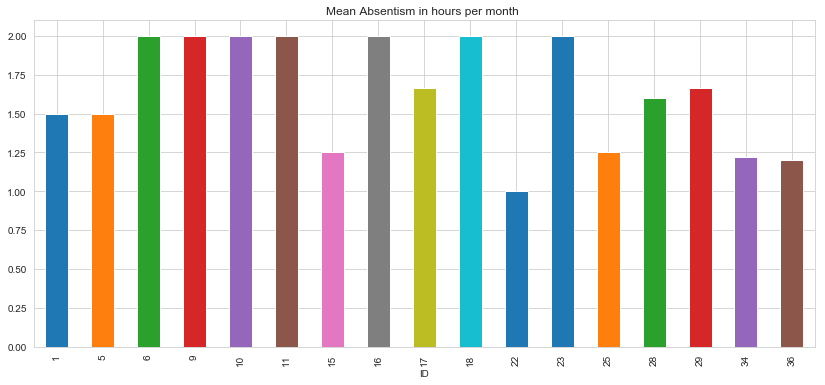

In [55]:
df1.groupby('ID')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours per month ',figsize=(14,6))
plt.show()

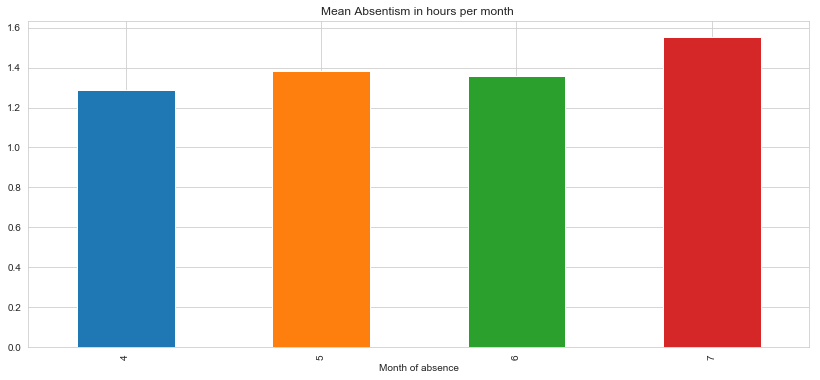

In [56]:
df1.groupby('Month of absence')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours per month ',figsize=(14,6))
plt.show()

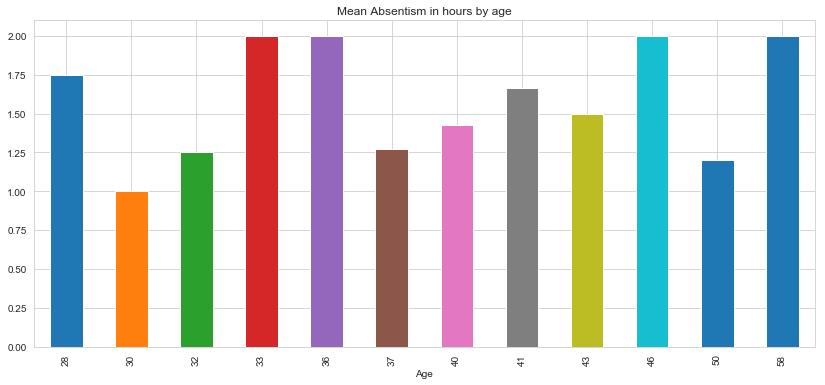

In [57]:
df1.groupby('Age')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours by age',figsize=(14,6))
plt.show()

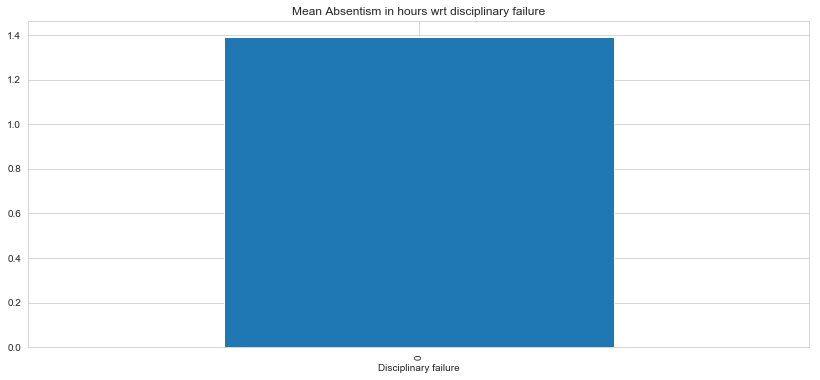

In [58]:
df1.groupby('Disciplinary failure')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours wrt disciplinary failure',figsize=(14,6))
plt.show()

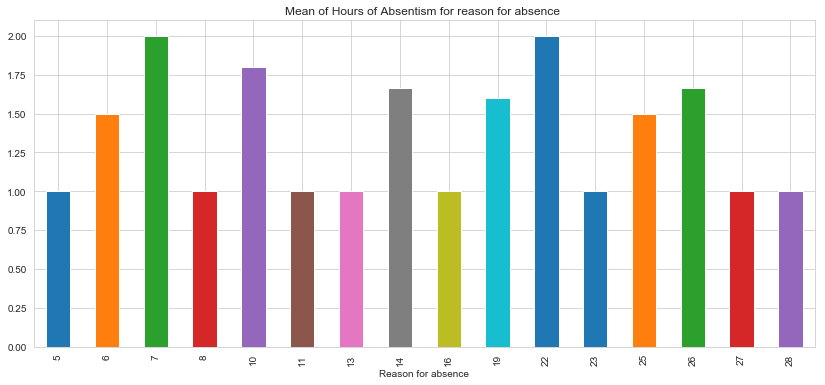

In [59]:
df1.groupby('Reason for absence')['AbsentHrs'].mean().plot(kind='bar',title='Mean of Hours of Absentism for reason for absence ',figsize=(14,6))
plt.show()

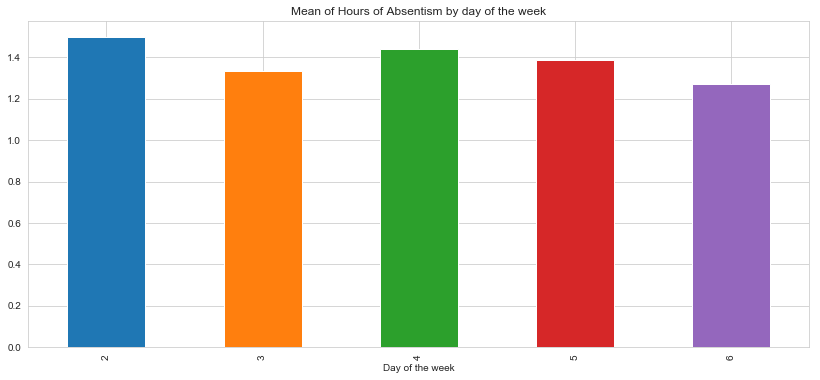

In [60]:
df1.groupby('Day of the week')['AbsentHrs'].mean().plot(kind='bar',title='Mean of Hours of Absentism by day of the week',figsize=(14,6))
plt.show()

ID                                    AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Reason for absence                 AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Month of absence                   AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Day of the week                       AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Seasons                            AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
Transportation expense             AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
Distance from Residence to Work       AxesSubplot(0.125,0.606915;0.227941x0.0803191)
Service time                       AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Age                                AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
WorkloadAverageday                    AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Hit target                         AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Disciplinary failure               AxesSubplot(0.672059,0.510532;

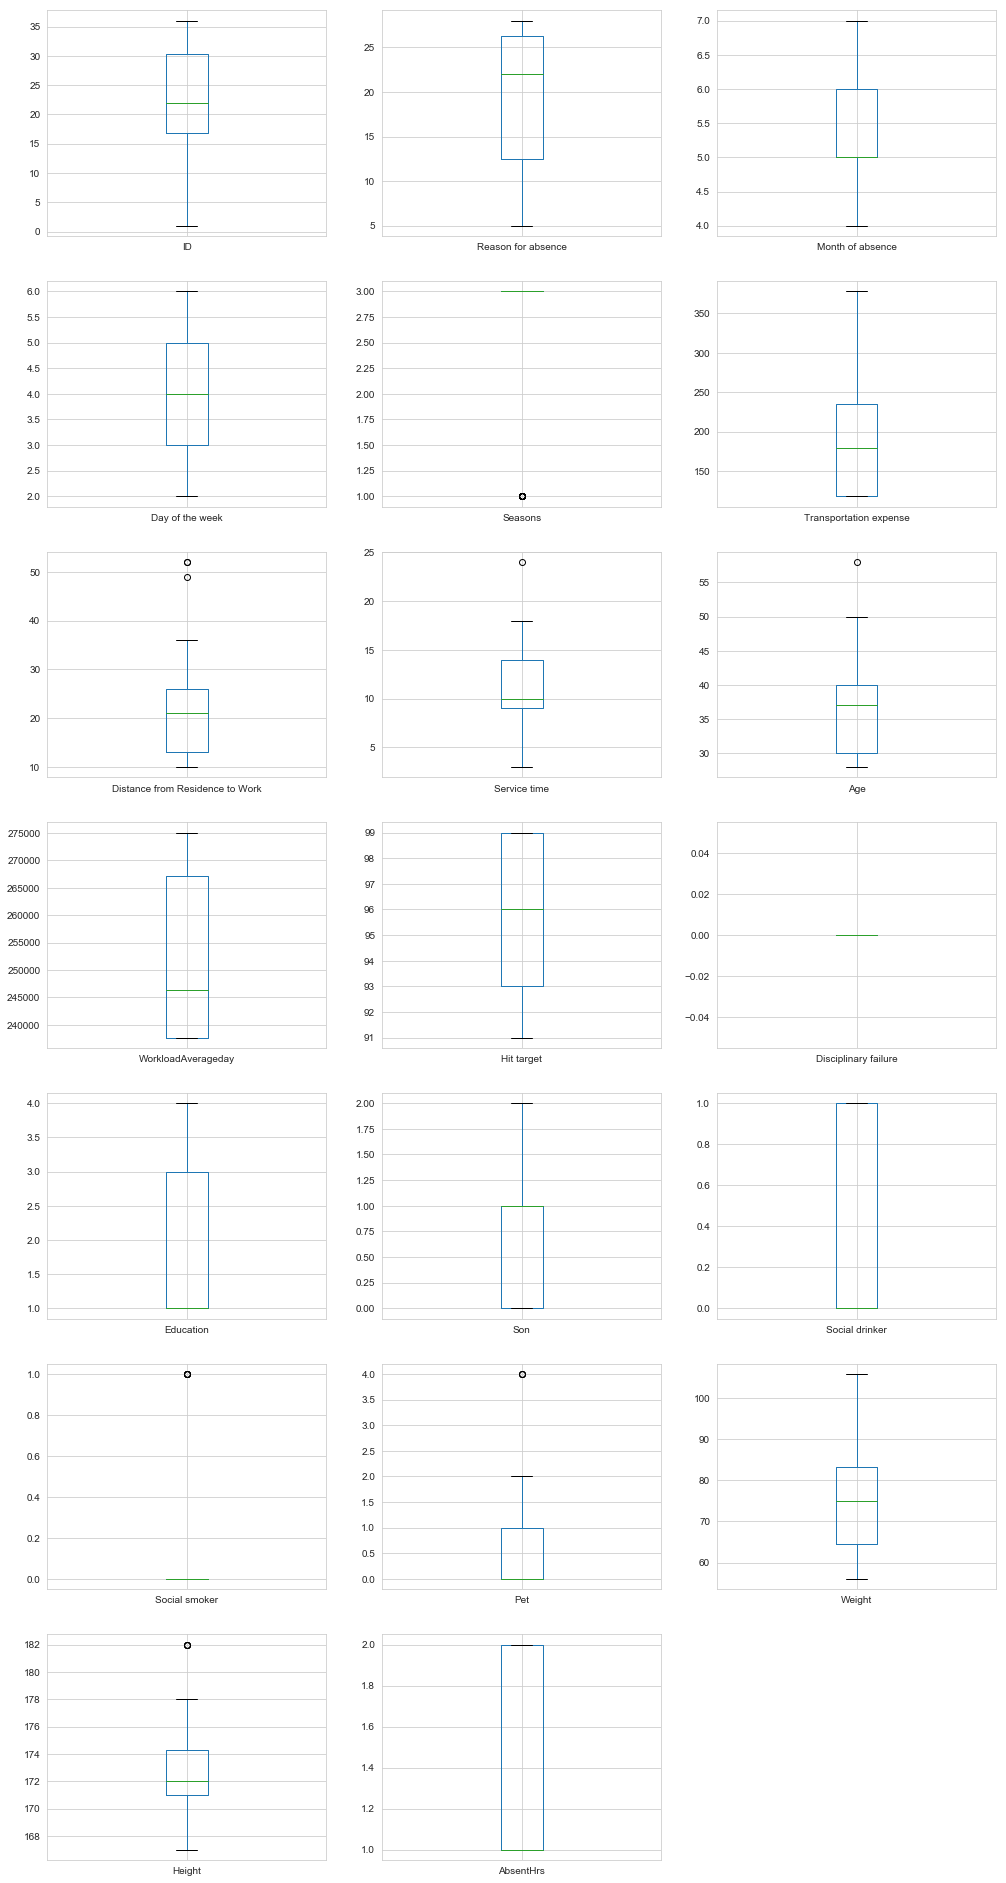

In [61]:
df_num=df1.select_dtypes(['float64','int64'])
df_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf 
cnames = ['Distance from Residence to Work', 'Service time', 'Age', 'WorkloadAverageday', 'Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height','AbsentHrs']
from statsmodels.tools.tools import add_constant
numeric_df = add_constant(data[cnames])
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], 
                 index = numeric_df.columns)
vif

const                              4966.422356
Distance from Residence to Work       4.402171
Service time                         14.434398
Age                                   4.707210
WorkloadAverageday                    1.524627
Transportation expense                4.735836
Hit target                            1.368779
Son                                  12.176358
Pet                                   5.359575
Weight                                2.259658
Height                                1.596611
AbsentHrs                             1.610705
dtype: float64

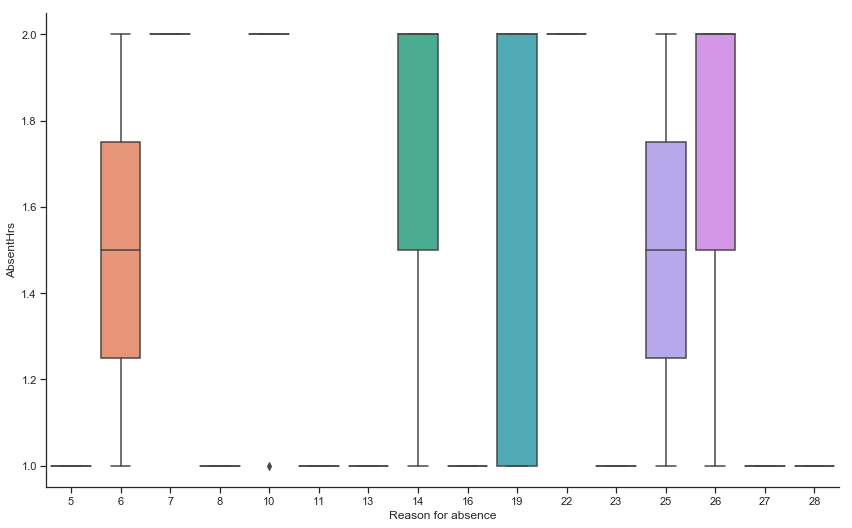

In [63]:

import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.catplot(x='Reason for absence', y="AbsentHrs", kind="box", data=df1,height=7.5,aspect=12/7.5)

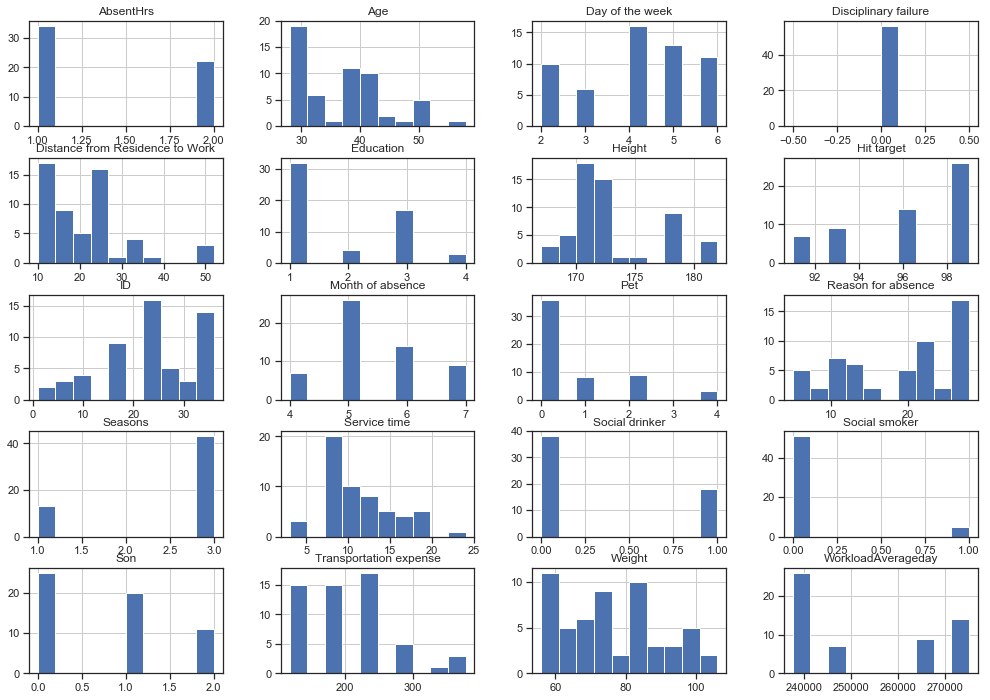

In [64]:
from matplotlib import pyplot
df_num.hist(figsize=(17,12))
pyplot.show()

In [65]:
from sklearn.linear_model import LogisticRegression 
model =LogisticRegression(solver='lbfgs',multi_class='multinomial')
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
from sklearn.metrics import confusion_matrix 
y_predict=model.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[5, 2],
       [3, 2]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_predict)*100

58.333333333333336

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

regressors = [DecisionTreeClassifier(), GradientBoostingRegressor(), RandomForestRegressor(),
              LinearRegression(),SVR(),KNeighborsRegressor()]

imp_cols=["regressors", "MSE"]
imp = pd.DataFrame(columns=imp_cols)
for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Result-test')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    print('Result-train')
    ori_predictions = rgr.predict(X_train)
    mse_t = np.sqrt(mean_squared_error(y_train, ori_predictions))
    print("RMSE: {}".format(mse_t))
    
    print("="*50)
    imp_entry = pd.DataFrame([[name, mse]], columns=imp_cols)
    imp = imp.append(imp_entry)

DecisionTreeClassifier
Result-test
RMSE: 0.5773502691896257
Result-train
RMSE: 0.0
GradientBoostingRegressor
Result-test
RMSE: 0.5150482594283676
Result-train
RMSE: 0.03653181579374162
RandomForestRegressor
Result-test
RMSE: 0.48648398397754755
Result-train
RMSE: 0.19598237397554633
LinearRegression
Result-test
RMSE: 0.4967424510554048
Result-train
RMSE: 0.3350500995632777
SVR
Result-test
RMSE: 0.5164144543225594
Result-train
RMSE: 0.12182250364116111
KNeighborsRegressor
Result-test
RMSE: 0.5066228051190222
Result-train
RMSE: 0.43797052619803295


C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\roli\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


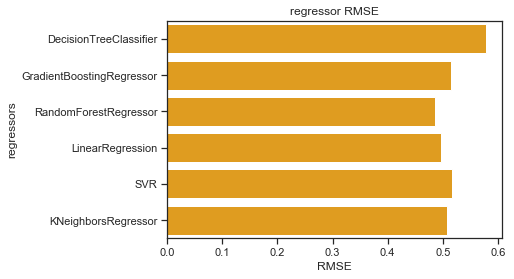

In [69]:
sns.set_color_codes("muted")
sns.barplot(x='MSE', y='regressors', data=imp, color="orange")

plt.xlabel('RMSE')
plt.title('regressor RMSE')
plt.show()

In [70]:
import pandas as pd
from sklearn import datasets 
import numpy as np 
iris =datasets.load_iris()
X = data# Sepal and pedal negthand width
from sklearn.preprocessing import scale
x =scale(X)
from sklearn.decomposition import PCA 
pca = PCA(n_components=10)
PC = pca.fit(x)
PC.components_

C:\Users\roli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


array([[ 1.13572981e-01, -1.59055232e-01,  1.19006323e-01,
        -8.35985703e-02, -4.31399422e-02, -1.93694600e-01,
        -2.77990272e-01,  4.34181533e-01,  4.69599062e-01,
         7.61300970e-02,  5.68147324e-02,  0.00000000e+00,
        -1.74785866e-01,  2.59524573e-01,  2.93087728e-01,
         9.41584305e-02, -8.42816812e-02,  3.86026180e-01,
         2.21864885e-01,  8.89976587e-02],
       [-3.40339266e-01, -6.38907700e-02,  1.69615018e-01,
        -1.16876451e-01, -1.15366511e-01,  4.02629076e-01,
         3.70972712e-01,  5.95169758e-03, -6.87271263e-03,
         3.23219541e-02, -3.70633755e-02, -1.69406589e-21,
        -1.61369871e-01,  3.68290760e-01,  1.99121219e-01,
         1.42306005e-01,  4.22653409e-01,  3.22725293e-02,
        -1.19352079e-01,  3.26520228e-01],
       [ 1.81567725e-02, -1.76553423e-02,  4.30838190e-01,
        -1.82503313e-01, -4.81467355e-01, -1.59280472e-01,
        -7.46456664e-02, -9.56831063e-02, -2.64982455e-02,
         4.44802285e-01, -3.3

In [71]:
PC.explained_variance_ratio_

array([0.19628565, 0.18710453, 0.15835619, 0.09517512, 0.07132561,
       0.05568988, 0.05460886, 0.04127685, 0.03484621, 0.0282283 ])

In [72]:
New_feats=pca.fit_transform(x)

In [73]:
New_feats

array([[-2.73040219e+00, -1.67309976e+00, -4.97275692e-01,
         9.51338656e-01,  1.26672372e+00, -5.70853786e-01,
        -2.34537726e-01,  1.71291196e+00, -4.38508629e-01,
        -3.32716248e-01],
       [-1.56295724e+00,  1.13535675e+00,  1.83646769e-01,
        -5.78555328e-01, -1.24518273e+00, -1.51936536e-01,
        -2.01570404e+00,  2.37845336e+00,  3.59800625e-01,
         7.69839723e-01],
       [-1.22580653e+00, -1.63955554e+00, -5.24129281e-01,
        -1.24913222e+00, -5.90042153e-01, -8.37394420e-01,
         4.41123697e-01,  1.97957012e+00, -7.47985295e-01,
        -1.40834973e-01],
       [-2.73040219e+00, -1.67309976e+00, -4.97275692e-01,
         9.51338656e-01,  1.26672372e+00, -5.70853786e-01,
        -2.34537726e-01,  1.71291196e+00, -4.38508629e-01,
        -3.32716248e-01],
       [-1.74919448e+00,  8.74984506e-01, -2.22926124e-01,
         1.28376676e-01, -3.00281139e-01, -9.93694419e-01,
        -2.16791411e+00,  1.94808356e+00,  5.44255509e-01,
        -1.

C:\Users\roli\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\roli\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


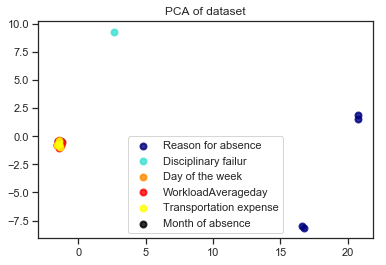

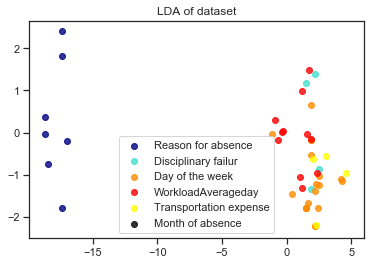

In [74]:
from sklearn import datasets
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = data_abs
target = data[data.keys()[-1]]
X = data.drop(['AbsentHrs'],axis=1)
y = target
target_names = ['Reason for absence','Disciplinary failur','Day of the week','WorkloadAverageday','Transportation expense',
                'Month of absence']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X = sc.fit_transform(X)  
X = sc.transform(X) 

pca=PCA(n_components=6)
X_r=pca.fit(X).transform(X)

lda=LinearDiscriminantAnalysis(n_components=6)
X_r2 =lda.fit(X,y).transform(X)# Percentage of variance explained for each component splt.figure()
lda.explained_variance_ratio_

colors =['navy','turquoise','darkorange','red','yellow','black']
lw=2
for color,i,target_name in zip(colors,[0,1,2,3,4,5],target_names):
    plt.scatter(X_r[y ==i,0],X_r[y ==i,1],color=color,alpha=.8,lw=lw,label=target_name)
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('PCA of dataset')
plt.figure()
for color,i,target_name in zip(colors,[0,1,2,3,4,5],target_names):
    plt.scatter(X_r2[y ==i,0],
                        X_r2[y ==i,1],alpha=.8,color=color,label=target_name)
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('LDA of dataset')
plt.show()


In [75]:
lda.explained_variance_ratio_

array([0.84619863, 0.05921482, 0.03174022, 0.01672171, 0.01380807,
       0.00982173])

In [76]:
pca.explained_variance_ratio_

array([0.54281462, 0.22901035, 0.12064041, 0.04241154, 0.0213872 ,
       0.01676536])

In [77]:
# Finding RMSE and accuracy for the selected model Random Forest

In [78]:
input_file = "C:/MyData Late-Spring/530 Machine Learning/data/Absenteeism_at_work_test.csv" 
data_abs = pd.read_csv(input_file)
data_abs.shape

(74, 21)

In [79]:
#data["WorkloadAverageday"] = data.WorkloadAverageday.replace(',', '')
#data["WorkloadAverageday"] = data['WorkloadAverageday'].astype('float')
#data["WorkloadAverageday"] = float(data["WorkloadAverageday"]) # turn from string to float.
# convert X into dataframe
X_pd = pd.DataFrame(data = data_abs.WorkloadAverageday)
# replace all instances of URC with 0 
X_replace = X_pd.replace(',','', regex=True)
# convert it back to numpy array
X_np = X_replace.values
# set the object type as float
X_fa = X_np.astype('float64')
data_abs["WorkloadAverageday"] = X_fa 
data_abs.dtypes
del data_abs['Body mass index']
data_abs.rename(columns={'Absenteeism time in hours':'AbsentHrs','Work load Average/day':'WorkloadAverageday'}, inplace=True)

In [80]:
import numpy as np
data_abs[data_abs==np.inf]=np.nan
data_abs.fillna(data_abs.mean(), inplace=True)
#data.fillna(0)
data = data_abs
target = data['AbsentHrs']
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
hrs_label = pd.Series(label_encoder.fit_transform(target>6))
import numpy as np
x = data.AbsentHrs > 0
y = data.AbsentHrs <= 6 
Grp1 = np.logical_and(x, y)
Grp2 = data.AbsentHrs > 6
Grp0 = (data.AbsentHrs == 0)

data.loc[Grp2,'AbsentHrs'] = 2
data.loc[Grp1,'AbsentHrs'] = 1
data.loc[Grp0,'AbsentHrs'] = 0

target = data[data.keys()[-1]]
from sklearn.model_selection import train_test_split 
y = target 
X = data.drop(['AbsentHrs'],axis=1)

In [81]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[2 0 0]
 [0 5 3]
 [0 3 2]]
60.0


C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

regressors = [RandomForestRegressor(),
              LinearRegression()]

imp_cols=["regressors", "MSE"]
imp = pd.DataFrame(columns=imp_cols)
for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Result-test')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    print('Result-train')
    ori_predictions = rgr.predict(X_train)
    mse_t = np.sqrt(mean_squared_error(y_train, ori_predictions))
    print("RMSE: {}".format(mse_t))
    
    print("="*50)
    imp_entry = pd.DataFrame([[name, mse]], columns=imp_cols)
    imp = imp.append(imp_entry)

RandomForestRegressor
Result-test
RMSE: 0.5050165013805654
Result-train
RMSE: 0.23794375730079173
LinearRegression
Result-test
RMSE: 0.7812452093289913
Result-train
RMSE: 0.32558217860002525


C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
df1 = data_abs
from sklearn.model_selection import train_test_split
y = df1['AbsentHrs']
X = df1.drop(columns=['AbsentHrs','ID'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

X_train = X_train.reset_index(drop=True)
X_train.index += 1
X_test = X_test.reset_index(drop=True)
X_test.index += 1
y_train = y_train.reset_index(drop=True)
y_train.index += 1
y_test = y_test.reset_index(drop=True)
y_test.index += 1

df1.isnull().any()

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test).round(0)
model_lr_dummies = sm.OLS(y_train,X_train).fit()
model_lr_dummies.summary()
##Linear Regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AbsentHrs   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     42.98
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           6.02e-21
Time:                        16:01:32   Log-Likelihood:                -17.919
No. Observations:                  59   AIC:                             71.84
Df Residuals:                      41   BIC:                             109.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Reason for absence                 -0.0124      0.008     -1.478      0.147      -0.029       0.005
Month of absence                    0.0713      0.088      0.814      0.420      -0.106       0.248
Day of the week                    -0.0116      0.049     -0.238      0.813      -0.110       0.087
Seasons                             0.2810      0.100      2.810      0.008       0.079       0.483
Transportation expense             -0.0002      0.001     -0.156      0.877      -0.003       0.003
Distance from Residence to Work     0.0064      0.014      0.468      0.643      -0.021       0.034
Service time                       -0.1262      0.048     -2.604      0.013      -0.224      -0.028
Age                                 0.0290      0.015      1.934      0.060      -0.001       0.059
WorkloadAverageday               7.788e-06   4.92e-06      1.582      0.121   -2.15e-06    1.77e-05
Hit target                         -0.0164      0.017     -0.981      0.332      -0.050       0.017
Disciplinary failure               -1.8520      0.280     -6.617      0.000      -2.417      -1.287
Education                           0.0755      0.082      0.916      0.365      -0.091       0.242
Son                                 0.5988      0.208      2.875      0.006       0.178       1.019
Social drinker                      0.0009      0.209      0.004      0.996      -0.422       0.424
Social smoker                       0.1858      0.259      0.716      0.478      -0.338       0.710
Pet                                -0.1439      0.086     -1.679      0.101      -0.317       0.029
Weight                              0.0097      0.008      1.154      0.255      -0.007       0.027
Height                             -0.0045      0.011     -0.396      0.694      -0.028       0.019
==============================================================================
Omnibus:                        0.991   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.997
Skew:                           0.171   Prob(JB):                        0.607
Kurtosis:                       2.463   Cond. No.                     1.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
#from sklearn.metrics import roc_curve, auc
#fpr, tpr, _ = roc_curve(y, y_pred)
#roc_auc = auc(fpr, tpr)

In [85]:
train_rmse_lr=sqrt(mean_squared_error(y_train,y_pred_train))
print("test_rmse_lr:")
train_rmse_lr

test_rmse_lr:


0.32558901600799134